<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/deepface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/serengil/deepface.git

Cloning into 'deepface'...
remote: Enumerating objects: 4026, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 4026 (delta 59), reused 85 (delta 57), pack-reused 3928
Receiving objects: 100% (4026/4026), 49.64 MiB | 20.03 MiB/s, done.
Resolving deltas: 100% (2486/2486), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [4]:
import sys
import os
os.chdir('/content/deepface/')


In [5]:
!pwd

/content/deepface


In [7]:
!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/deepface
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=4bf6c00e905524bc52b6adb80eae15d49088d346a54325846b306e4c14cbe782
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
  Running setup.py develop for deepface


In [8]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [10]:
!mkdir images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh_prob.jpg -P images

--2023-06-12 21:56:33--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132827 (130K) [image/jpeg]
Saving to: ‘images/moh.jpg’

moh.jpg             100%[===================>] 129.71K  --.-KB/s    in 0.01s   

2023-06-12 21:56:33 (11.4 MB/s) - ‘images/moh.jpg’ saved [132827/132827]

--2023-06-12 21:56:33--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh_prob.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27504 (2

In [14]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


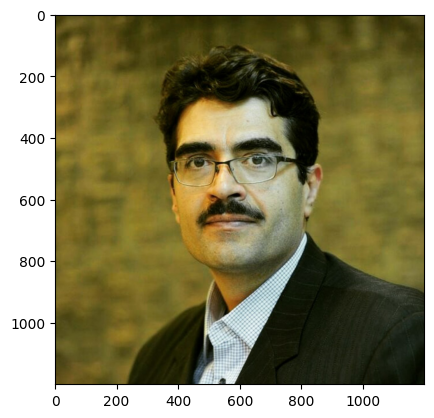

In [15]:
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
img = plt.imread("/content/deepface/images/moh.jpg")
plt.imshow(img)
plt.show()

In [16]:
face_detector = MTCNN()

In [17]:
# draw an image with detected objects
def draw_facebox_and_keypoints(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
            # show the plot
    plt.show()# filename = 'test1.jpg' # filename is defined above, otherwise uncomment

In [18]:
results = face_detector.detect_faces(img)

1/1 [==============================] - 0s 135ms/step


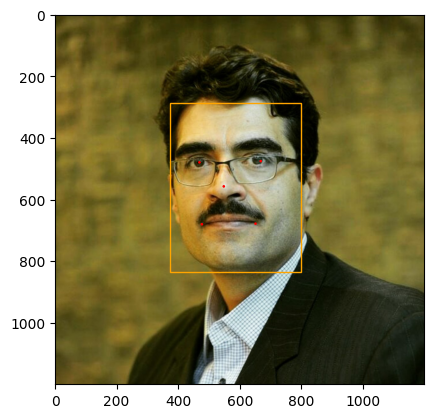

In [20]:
draw_facebox_and_keypoints('/content/deepface/images/moh.jpg', results)

In [11]:
result = DeepFace.verify(img1_path = "/content/deepface/images/moh.jpg", img2_path = "/content/deepface/images/moh_prob.jpg")

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:08<00:00, 69.6MB/s]


In [13]:
print(result)

{'verified': False, 'distance': 0.7287406954335159, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 293, 'y': 265, 'w': 539, 'h': 539}, 'img2': {'x': 51, 'y': 98, 'w': 207, 'h': 207}}, 'time': 14.54}


In [63]:
# draw an image with detected objects
def draw_facebox(filename, image1):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    image1=image1.values()
    # get coordinates
    x, y, width, height = image1
    # create the shape
    rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
    # draw the box
    ax.add_patch(rect)
    # show the plot
    plt.show()# filename = 'test1.jpg' # filename is defined above, otherwise uncomment

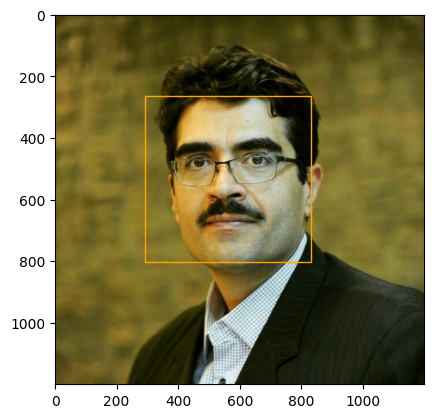

In [64]:
draw_facebox('/content/deepface/images/moh.jpg', result['facial_areas']['img1'])

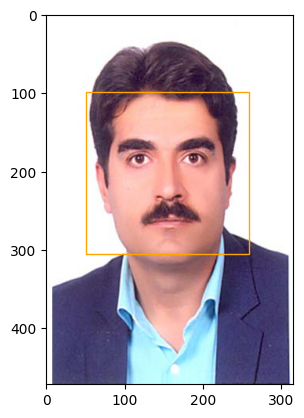

In [65]:
draw_facebox('/content/deepface/images/moh_prob.jpg', result['facial_areas']['img2'])